In [1]:
import codigo
from codigo import utils
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pickle import dump
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [3]:
arrayPod=[]
for i in range(6):
    arrayPod.append(i+1)


dfPod= pd.DataFrame(arrayPod)
dfPod.columns = ['podid']
dfPod

,podid
0,1
1,2
2,3
3,4
4,5
5,6


In [4]:
scalerPodId = MinMaxScaler()

arrayPod=scalerPodId.fit_transform(dfPod[['podid']].values)
arrayPod

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])

In [5]:
scalerPodId.transform([[4]])

array([[0.6]])

In [6]:
utils.id_partOfDay('Eve')

4

# Importar Dataset depurado

In [7]:
df_Inicial = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

# Revisamos las columnas que contiene el Dataset

In [8]:
df_Inicial.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0


In [9]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 67.9+ MB


### Cambiamos el formato de la columna Date de object a datetime64

In [10]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [11]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.9+ MB


In [12]:
df_Inicial['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [13]:
df_Inicial['Date'].max()

Timestamp('2022-03-20 23:58:00')

# Iniciamos Análisis Exploratorio

In [14]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_Inicial, title="Pandas Profiling Report",
    missing_diagrams={
          'heatmap': True,
          'dendrogram': False,
      },
    correlations={
         "kendall": {"calculate": False},
         "phi_k": {"calculate": False},
         "cramers": {"calculate": False},
         "pearson": {"calculate": True,"threshold":0.8,"warn_high_correlations":True}
        
     }, interactions=None,samples=None)

In [15]:
profile.to_file("analisisExploratorio/datasetDepurado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df=df_Inicial

# Muestreo y Selección

## Contamos los registros de cada paciente

In [17]:
dfPacienteCount= pd.DataFrame(df.ID.value_counts().sort_values(ascending=False))
dfPacienteCount.columns = ['Freq']
dfPacienteCount

,Freq
LIB193277,114563
LIB193385,112924
LIB193307,104043
LIB193309,77285
LIB193367,76611
...,...
LIB193366,1287
LIB193398,1253
LIB193283,1098
LIB193365,1057


In [18]:
dfPacienteCount.tail(50)

,Freq
LIB193346,16213
LIB193312,16155
LIB193372,15782
LIB193358,15146
LIB193317,14896
LIB193271,14859
LIB193392,13627
LIB193353,13083
LIB193274,11804
LIB193378,11730


<AxesSubplot:>

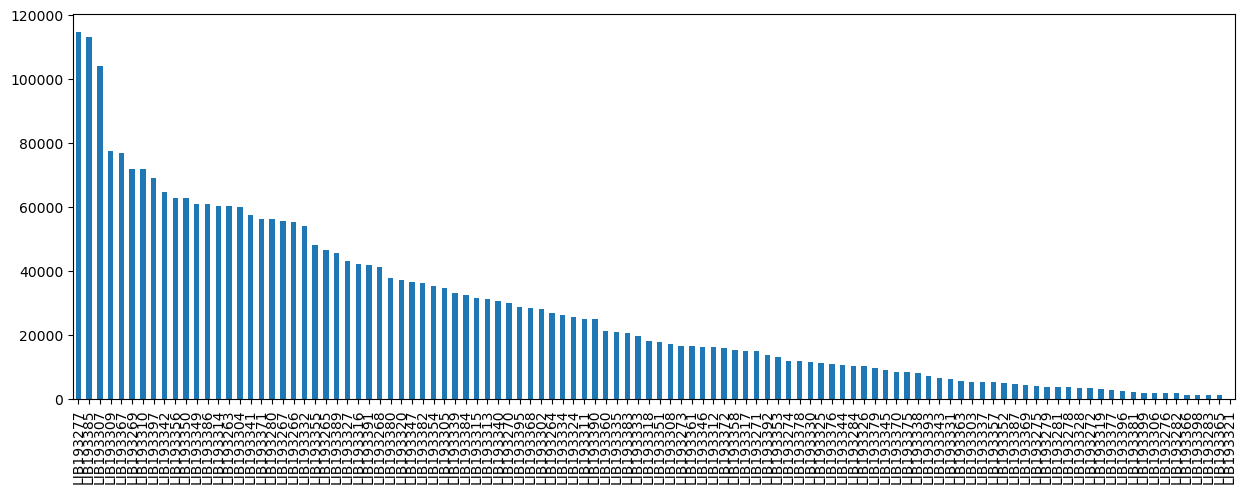

In [19]:
dfPacienteCount['Freq'].plot.bar(figsize=(15, 5))

## Eliminamos los pacientes que no forman parte del entrenamiento

In [25]:
pacientesNoDeseados=['LIB193321','LIB193399','LIB193271']
dfIDPacientesTrain=dfPacienteCount[~dfPacienteCount.index.isin(pacientesNoDeseados)]

In [26]:
dfIDPacientesTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, LIB193277 to LIB193365
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Freq    105 non-null    int64
dtypes: int64(1)
memory usage: 1.6+ KB


In [27]:
dfIDPacientesTrain.sum()

Freq    2949911
dtype: int64

In [29]:
pacientesTest=['LIB193399','LIB193271']

In [30]:
dfIDPacientesTest=dfPacienteCount[dfPacienteCount.index.isin(pacientesTest)]

In [31]:
dfIDPacientesTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, LIB193271 to LIB193399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Freq    2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


### Guardamos los IDs de Train y Test

In [32]:
dfIDPacientesTrain['ID']=dfIDPacientesTrain.index
dfIDPacientesTrain['ID'].to_csv('dataset/generado/IDs_Train.csv', index=False) 
dfIDPacientesTrain['ID'].count()

105

In [33]:
dfIDPacientesTest['ID']=dfIDPacientesTest.index
dfIDPacientesTest['ID'].to_csv('dataset/generado/IDs_Test.csv', index=False) 
dfIDPacientesTest['ID'].count()

2

## Limpieza de Datos

### Analizamos los datos de 1 paciente con las muestras ordenadas cada 15 min

In [31]:
pacienteID="LIB193277"
paciente = utils.getDataPatient(df,pacienteID,'15min')
paciente

,Glucose level
Date,
2018-06-12 20:15:00,156.0
2018-06-12 20:30:00,163.0
2018-06-12 20:45:00,158.0
2018-06-12 21:00:00,167.0
2018-06-12 21:15:00,139.0
...,...
2022-03-18 10:45:00,153.0
2022-03-18 11:00:00,144.0
2022-03-18 11:15:00,134.0


Realizamos un análisis exploratorio

In [32]:
profile = ProfileReport(paciente, title="Pandas Profiling Report",
    missing_diagrams=None,
    correlations=None, interactions=None,samples=None)
profile.to_file("analisisExploratorio/analisis_paciente_ID_LIB193277.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Obtenemos los registros faltantes

In [33]:
paciente_Null=paciente.isnull()
paciente_Null.sum()

Glucose level    17736
dtype: int64

Se observa que no todos los registros fueron tomados cada 15 min, y existen datos faltantes

In [34]:
paciente_Null.tail()

,Glucose level
Date,
2022-03-18 10:45:00,False
2022-03-18 11:00:00,False
2022-03-18 11:15:00,False
2022-03-18 11:30:00,False
2022-03-18 11:45:00,False


Pasamos a excel para analizar en detalle esos datos faltantes

In [35]:
paciente.to_excel("analisisExploratorio/paciente_ID_LIB193277.xlsx")  

<AxesSubplot:xlabel='Date'>

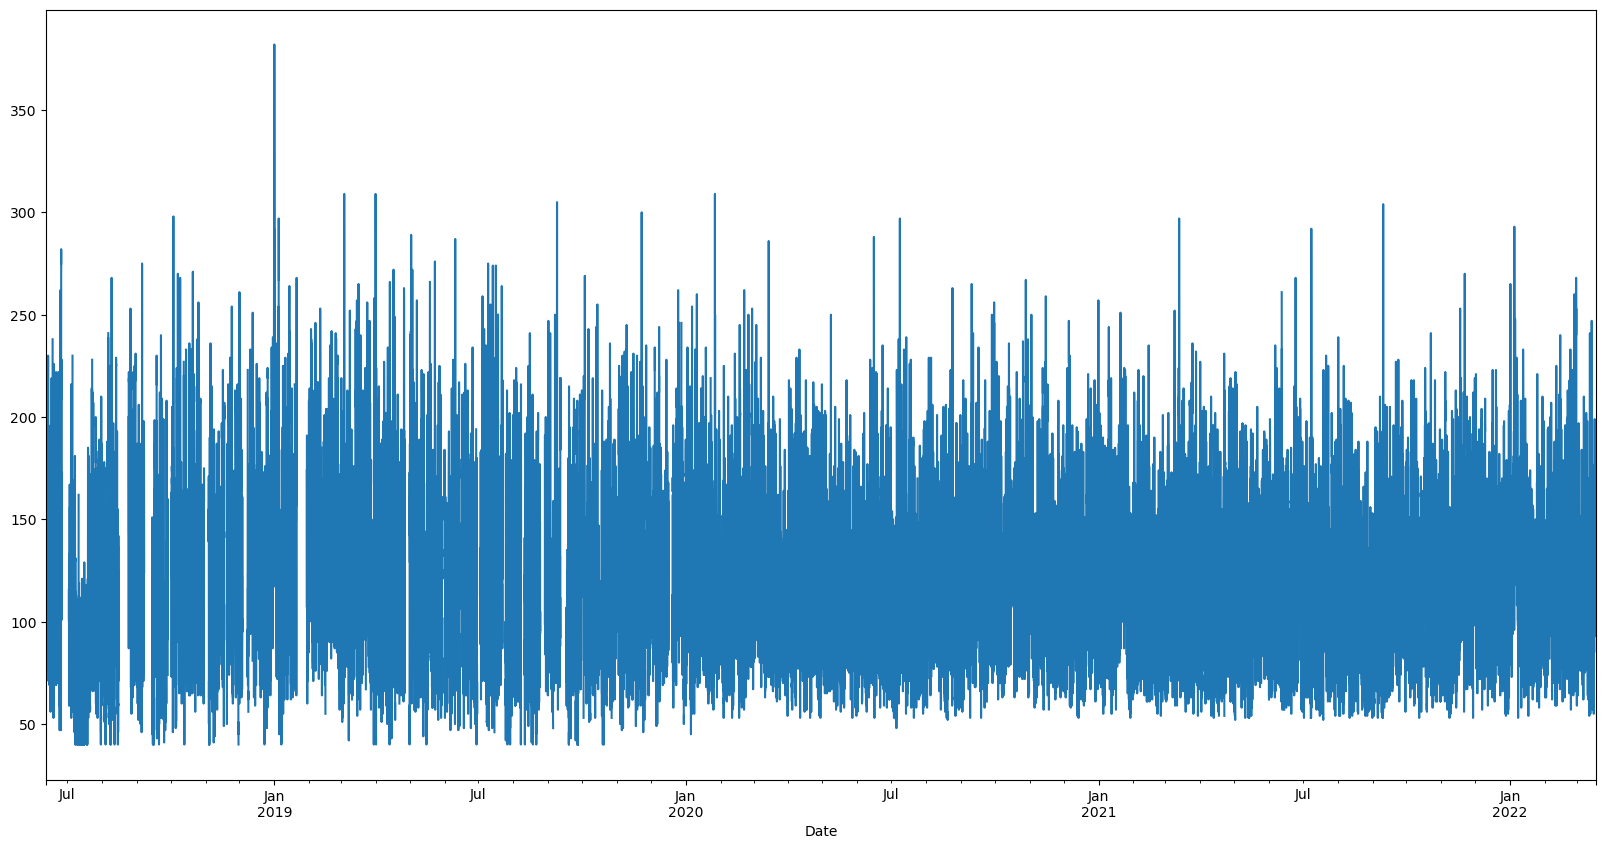

In [36]:
paciente['Glucose level'].plot(figsize=(20, 10))

<AxesSubplot:>

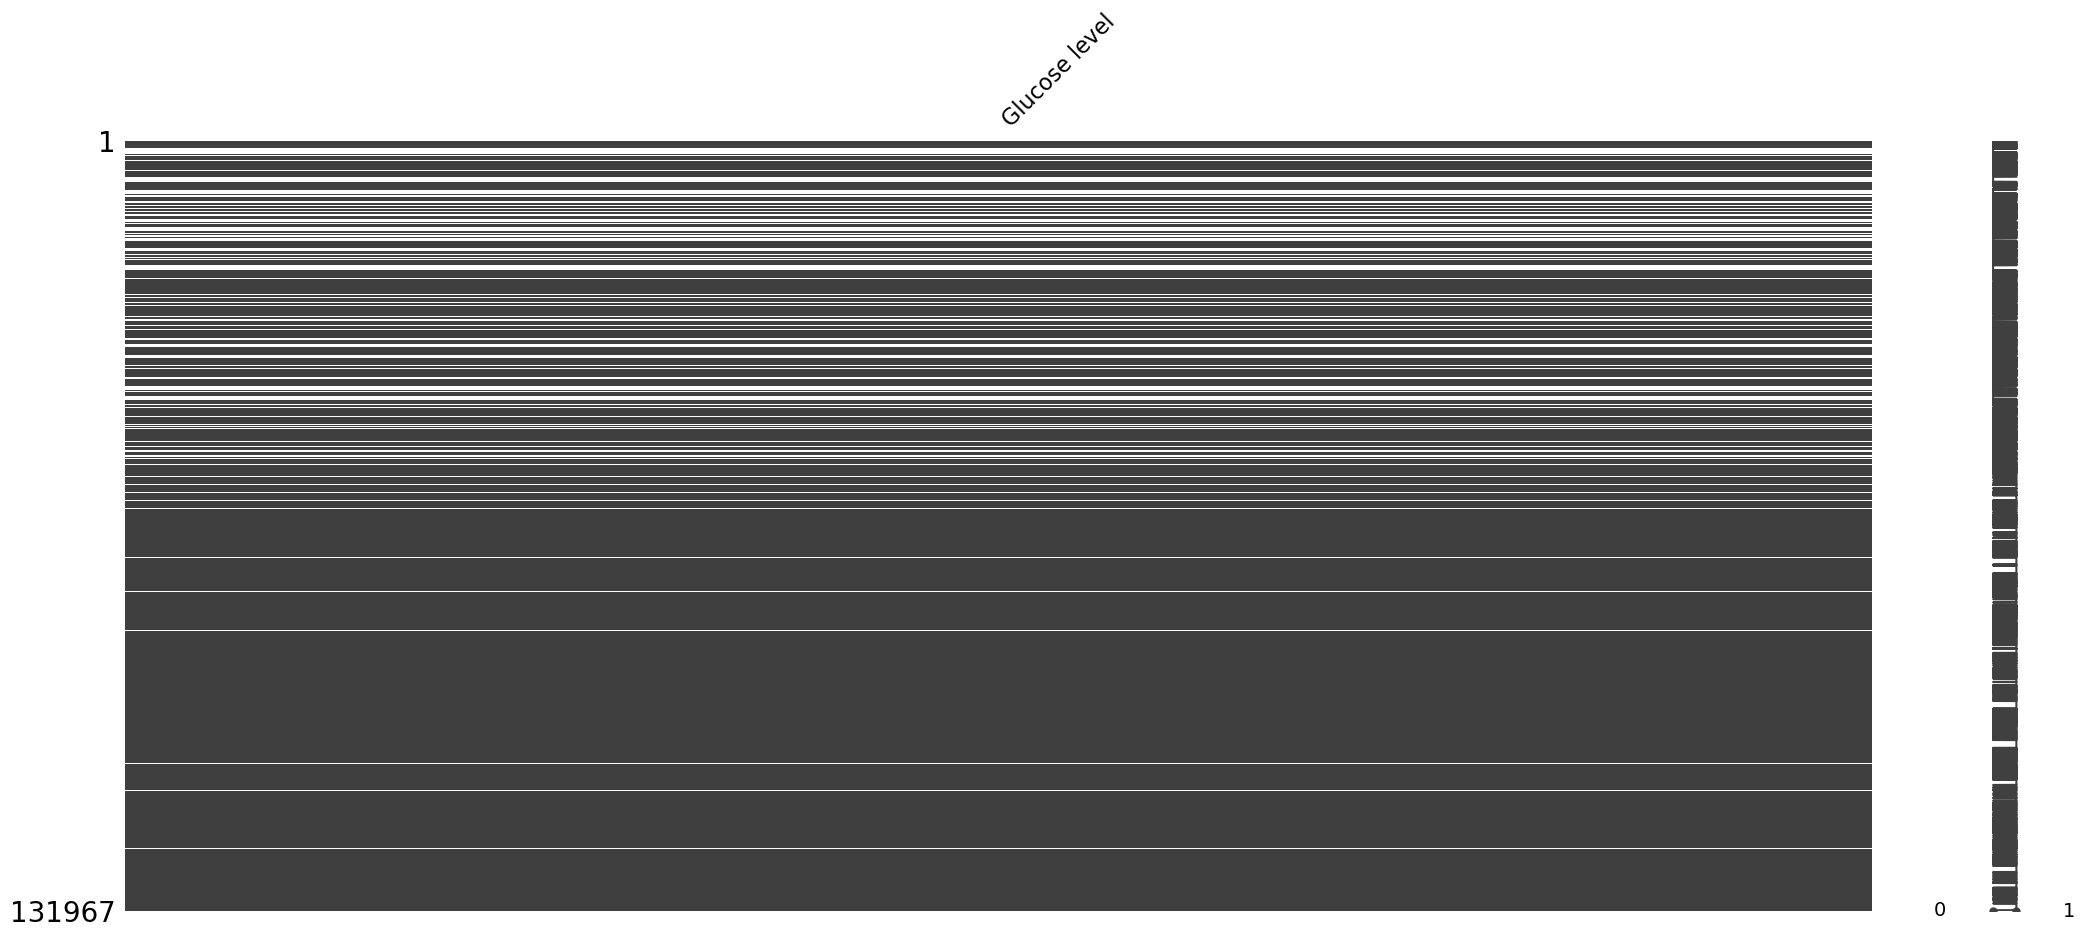

In [37]:
import missingno as msno
msno.matrix(paciente)

### Estrategia de reemplazo de datos faltantes

Nos enfocaremos en un rango de fechas con mayor número de registro faltanes

In [38]:
ObjRangeDateStart='2020-6-12';
ObjRangeDateEnd='2020-6-25';

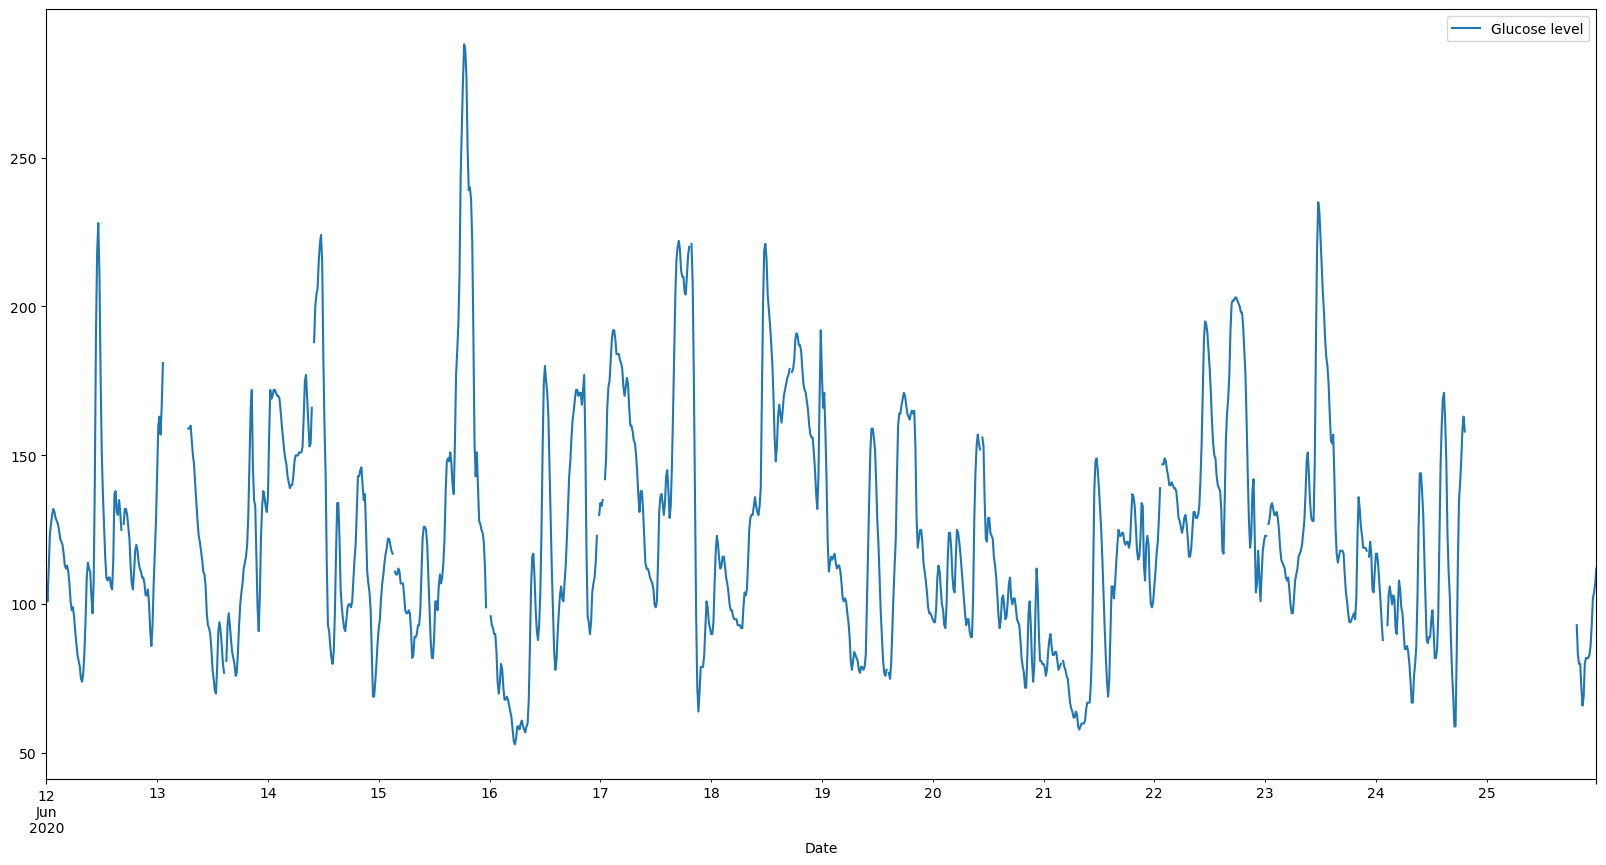

In [39]:
utils.plotRangeDates(paciente,ObjRangeDateStart,ObjRangeDateEnd)

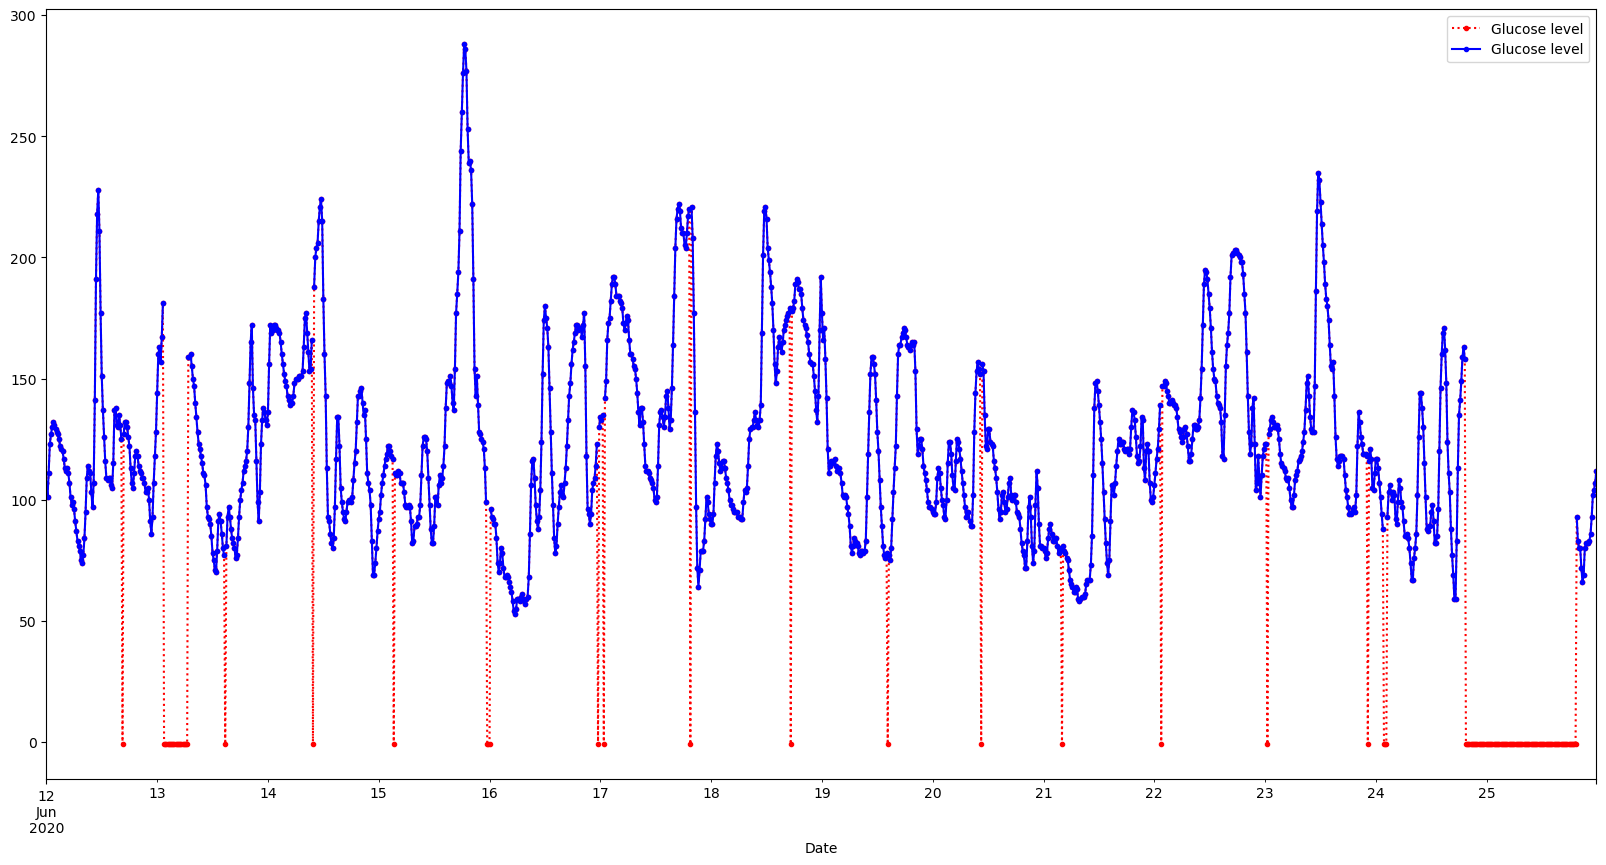

In [40]:
paciente_fill=utils.fillNullData(paciente,'-1')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

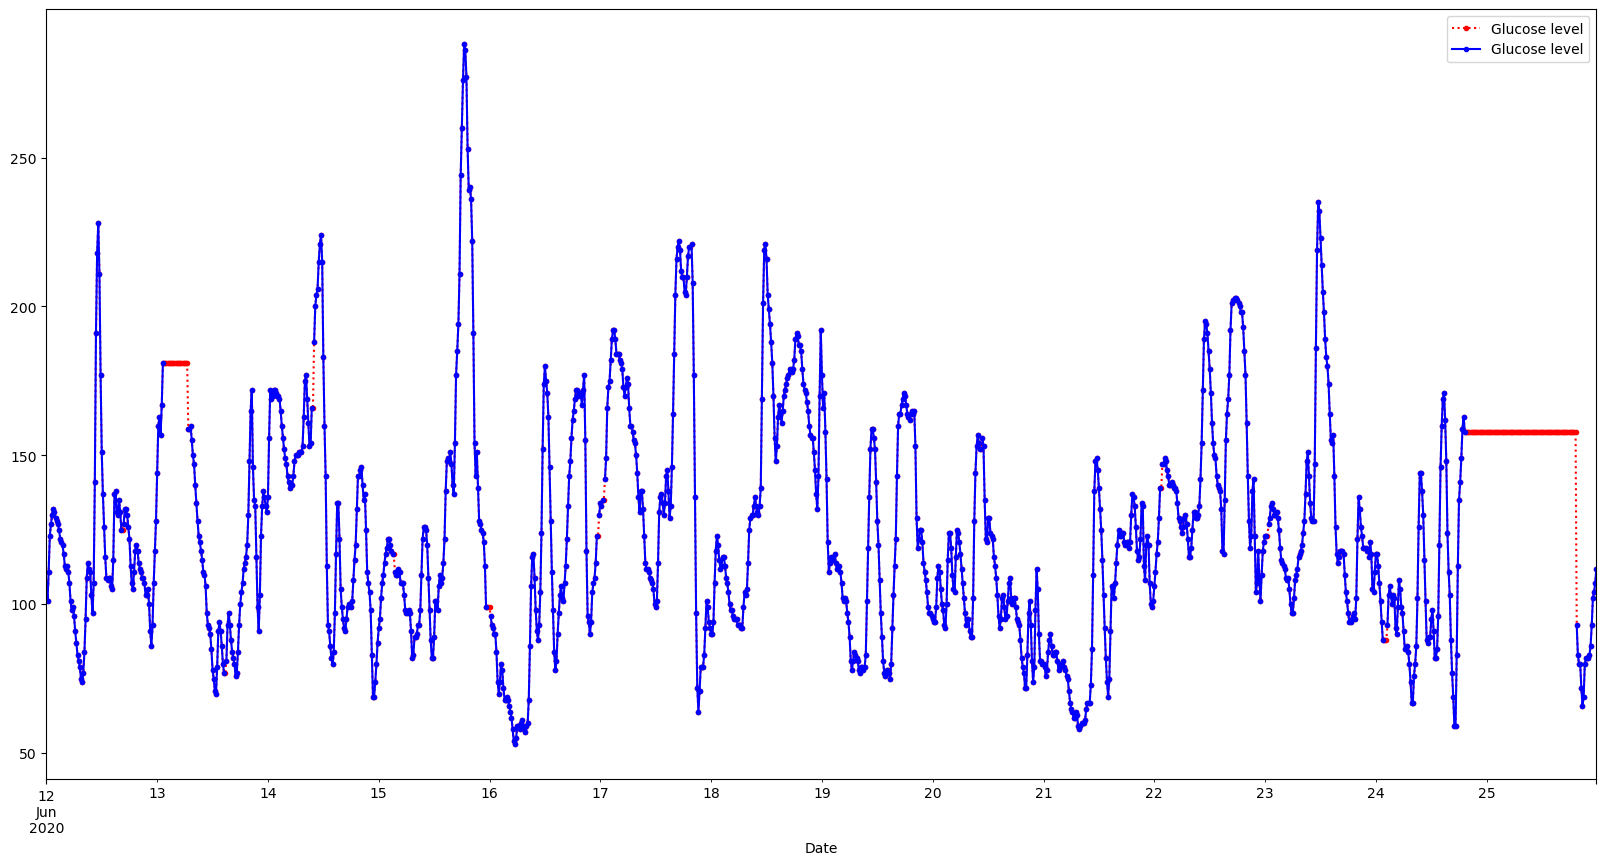

In [41]:
paciente_fill=utils.fillNullData(paciente,'ffill')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

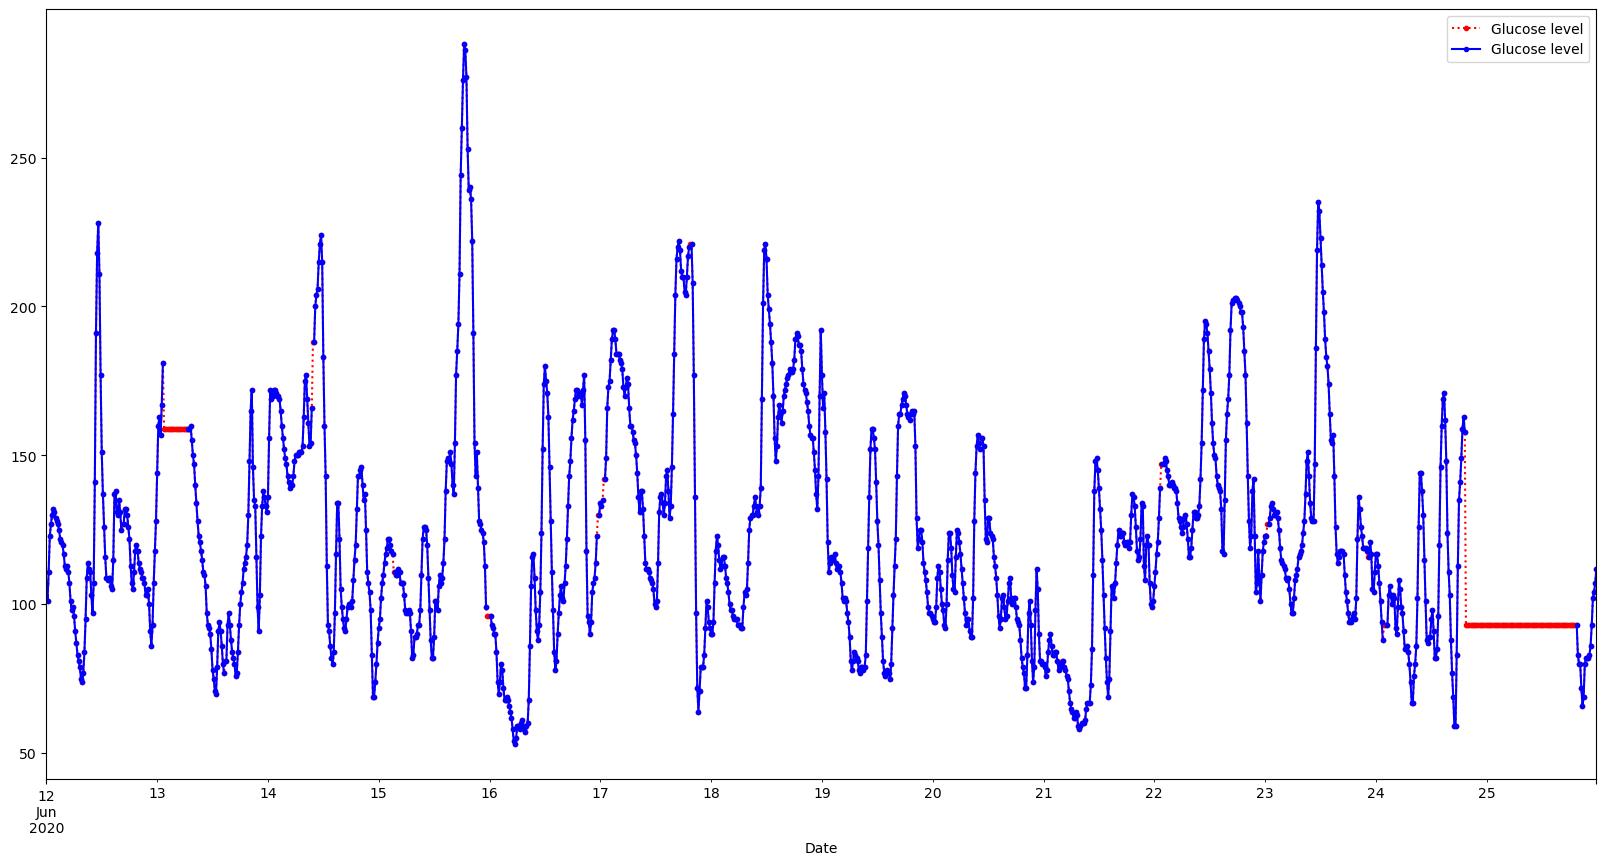

In [42]:
paciente_fill=utils.fillNullData(paciente,'bfill')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

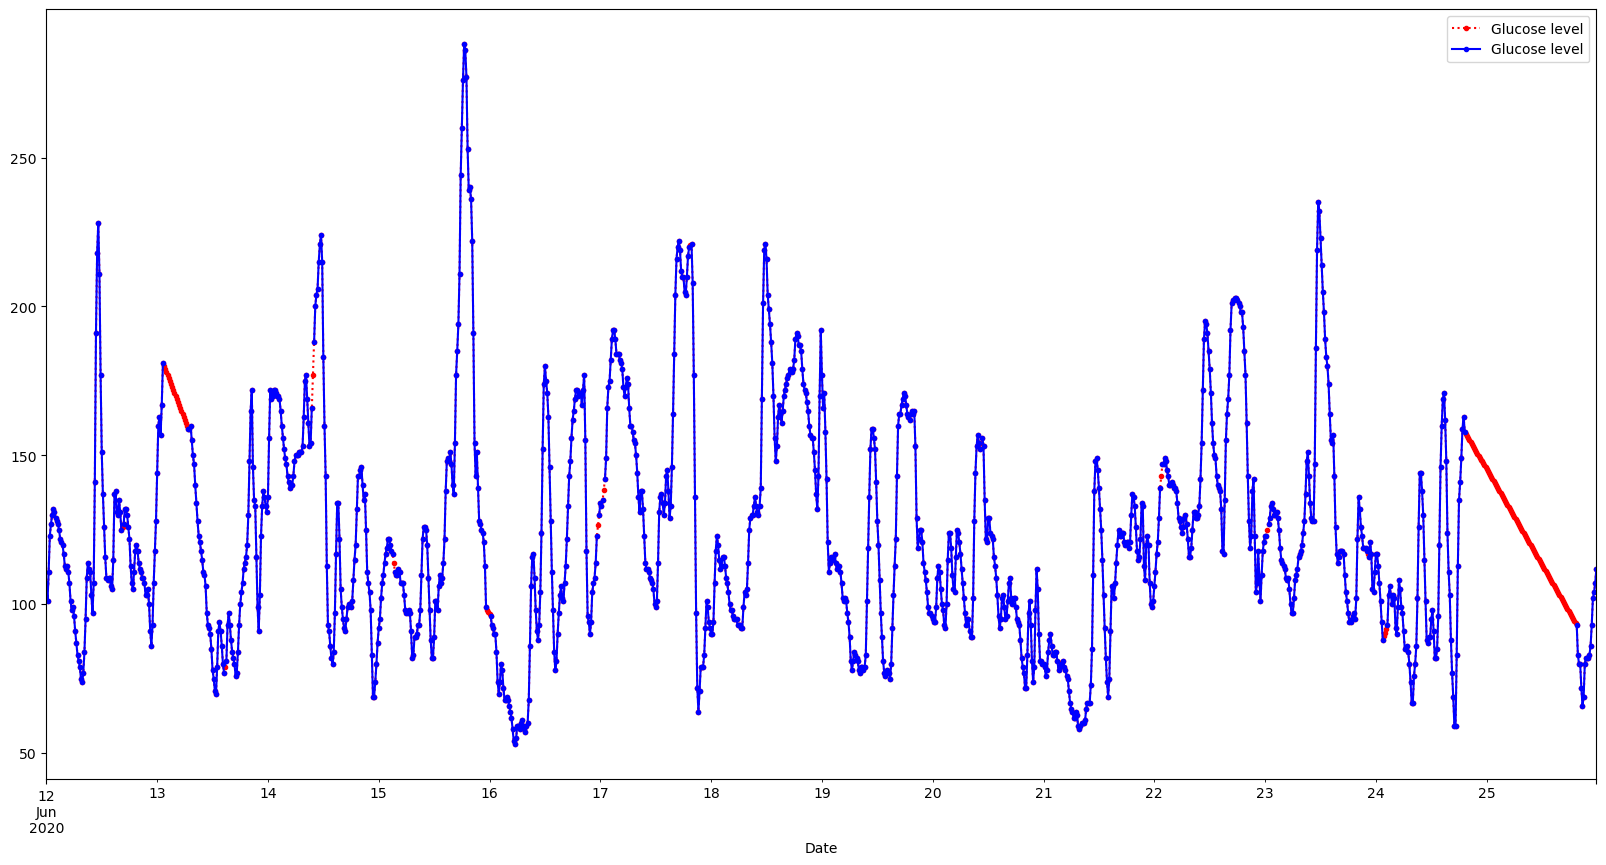

In [43]:
paciente_fill=utils.fillNullData(paciente,'interpolate_linear')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

In [44]:
paciente_fill_Null=paciente_fill.isnull()
paciente_fill_Null.sum()

Glucose level    0
dtype: int64

# Estrategia de escalado de los datos

In [45]:
df['Glucose level'].head()

0    99.0
1    92.0
2    86.0
3    85.0
4    85.0
Name: Glucose level, dtype: float64

In [46]:
scalerGlucosa = MinMaxScaler(feature_range=(0,1))

df[['Glucose level']]=scalerGlucosa.fit_transform(df[['Glucose level']].values)
dump(scalerGlucosa, open('dataset/generado/scalerGlucosa.scaler', 'wb'))

In [47]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,0.128261
1,LIB193263,2020-06-09 19:23:00,0.113043
2,LIB193263,2020-06-09 19:38:00,0.100000
3,LIB193263,2020-06-09 19:53:00,0.097826
4,LIB193263,2020-06-09 20:08:00,0.097826
...,...,...,...
2966680,LIB193399,2020-10-20 20:50:00,0.093478
2966681,LIB193399,2020-10-20 21:05:00,0.078261
2966682,LIB193399,2020-10-20 21:20:00,0.058696
2966683,LIB193399,2020-10-20 21:35:00,0.050000


In [48]:
df[['Glucose level']]=scalerGlucosa.inverse_transform(df[['Glucose level']].values)

In [49]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0
...,...,...,...
2966680,LIB193399,2020-10-20 20:50:00,83.0
2966681,LIB193399,2020-10-20 21:05:00,76.0
2966682,LIB193399,2020-10-20 21:20:00,67.0
2966683,LIB193399,2020-10-20 21:35:00,63.0


In [50]:
from pickle import load
scalerGlucosaGuardado = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [51]:
df[['Glucose level']]=scalerGlucosaGuardado.transform(df[['Glucose level']].values)

In [52]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,0.128261
1,LIB193263,2020-06-09 19:23:00,0.113043
2,LIB193263,2020-06-09 19:38:00,0.100000
3,LIB193263,2020-06-09 19:53:00,0.097826
4,LIB193263,2020-06-09 20:08:00,0.097826
...,...,...,...
2966680,LIB193399,2020-10-20 20:50:00,0.093478
2966681,LIB193399,2020-10-20 21:05:00,0.078261
2966682,LIB193399,2020-10-20 21:20:00,0.058696
2966683,LIB193399,2020-10-20 21:35:00,0.050000


In [53]:
df[['Glucose level']]=scalerGlucosaGuardado.inverse_transform(df[['Glucose level']].values)

In [54]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0
...,...,...,...
2966680,LIB193399,2020-10-20 20:50:00,83.0
2966681,LIB193399,2020-10-20 21:05:00,76.0
2966682,LIB193399,2020-10-20 21:20:00,67.0
2966683,LIB193399,2020-10-20 21:35:00,63.0


In [55]:
arrayHours=[]
for i in range(24):
    arrayHours.append(i)


dfHours= pd.DataFrame(arrayHours)
dfHours.columns = ['hours']
dfHours

,hours
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [56]:
scalerHours = MinMaxScaler()

arrayHours=scalerHours.fit_transform(dfHours[['hours']].values)
dump(scalerHours, open('dataset/generado/scalerHours.scaler', 'wb'))
arrayHours

array([[0.        ],
       [0.04347826],
       [0.08695652],
       [0.13043478],
       [0.17391304],
       [0.2173913 ],
       [0.26086957],
       [0.30434783],
       [0.34782609],
       [0.39130435],
       [0.43478261],
       [0.47826087],
       [0.52173913],
       [0.56521739],
       [0.60869565],
       [0.65217391],
       [0.69565217],
       [0.73913043],
       [0.7826087 ],
       [0.82608696],
       [0.86956522],
       [0.91304348],
       [0.95652174],
       [1.        ]])

In [57]:
arrayHoursT=scalerHours.inverse_transform([[1]])
arrayHoursT[0]

array([23.])

In [58]:
arrayMins=[]
for i in range(60):
    arrayMins.append(i)


dfMins= pd.DataFrame(arrayMins)
dfMins.columns = ['mins']
dfMins

,mins
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [59]:
scalerMin = MinMaxScaler()

arrayMins=scalerMin.fit_transform(dfMins[['mins']].values)
dump(scalerMin, open('dataset/generado/scalerMin.scaler', 'wb'))
arrayMins

array([[0.        ],
       [0.01694915],
       [0.03389831],
       [0.05084746],
       [0.06779661],
       [0.08474576],
       [0.10169492],
       [0.11864407],
       [0.13559322],
       [0.15254237],
       [0.16949153],
       [0.18644068],
       [0.20338983],
       [0.22033898],
       [0.23728814],
       [0.25423729],
       [0.27118644],
       [0.28813559],
       [0.30508475],
       [0.3220339 ],
       [0.33898305],
       [0.3559322 ],
       [0.37288136],
       [0.38983051],
       [0.40677966],
       [0.42372881],
       [0.44067797],
       [0.45762712],
       [0.47457627],
       [0.49152542],
       [0.50847458],
       [0.52542373],
       [0.54237288],
       [0.55932203],
       [0.57627119],
       [0.59322034],
       [0.61016949],
       [0.62711864],
       [0.6440678 ],
       [0.66101695],
       [0.6779661 ],
       [0.69491525],
       [0.71186441],
       [0.72881356],
       [0.74576271],
       [0.76271186],
       [0.77966102],
       [0.796

In [60]:
arrayMinT=scalerMin.inverse_transform([[1]])
arrayMinT[0]

array([59.])

In [61]:
arrayPod=[]
for i in range(6):
    arrayPod.append(i+1)


dfPod= pd.DataFrame(arrayPod)
dfPod.columns = ['podid']
dfPod

,podid
0,1
1,2
2,3
3,4
4,5
5,6


In [62]:
scalerPodId = MinMaxScaler()

arrayPod=scalerPodId.fit_transform(dfPod[['podid']].values)
dump(scalerPodId, open('dataset/generado/scalerPodId.scaler', 'wb'))
arrayPod

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])

In [63]:
arrayPodT=scalerPodId.inverse_transform([[0.6]])
arrayPodT[0]

array([4.])

In [64]:
arrayLevel=[-1,0,1]
dfLevel= pd.DataFrame(arrayLevel)
dfLevel.columns = ['levelid']
dfLevel

,levelid
0,-1
1,0
2,1


In [65]:
scalerLevelId = MinMaxScaler()

arrayLevel=scalerLevelId.fit_transform(dfLevel[['levelid']].values)
dump(scalerLevelId, open('dataset/generado/scalerLevelId.scaler', 'wb'))
arrayLevel

array([[0. ],
       [0.5],
       [1. ]])

In [66]:
arrayLevelT=scalerLevelId.transform([[-1]])
arrayLevelT[0]

array([0.])

# Estrategia de creación de caracteristicas

In [67]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0
...,...,...,...
2966680,LIB193399,2020-10-20 20:50:00,83.0
2966681,LIB193399,2020-10-20 21:05:00,76.0
2966682,LIB193399,2020-10-20 21:20:00,67.0
2966683,LIB193399,2020-10-20 21:35:00,63.0


In [68]:
paciente_data_15 = utils.getDataPatient(df,pacienteID,'15min',False)

paciente_data_15['level_label'] = paciente_data_15['Glucose level'].apply(utils.label_LevelBG)
paciente_data_15['level_id'] = paciente_data_15['level_label'].apply(utils.id_LevelBG)
paciente_data_15['level_id'] = scalerLevelId.transform(paciente_data_15[['level_id']].values)
paciente_data_15['Glucose level'] = scalerGlucosa.transform(paciente_data_15[['Glucose level']].values)

paciente_data_15=utils.fillNullData(paciente_data_15,'interpolate_linear')

paciente_data_15=utils.generateNewColumns(paciente_data_15,scalerHours,scalerMin)
paciente_data_15['pod_id'] = scalerPodId.transform(paciente_data_15[['pod_id']].values)

paciente_data_15

,Glucose level,level_label,level_id,Gt,Gt+r,Yt,hour,pod_label,pod_id,min
Date,,,,,,,,,,
2018-06-12 20:15:00,0.252174,normal,0.5,0.000000,0.252174,0.000000,0.869565,Eve,0.6,0.254237
2018-06-12 20:30:00,0.267391,normal,0.5,0.252174,0.267391,0.015217,0.869565,Eve,0.6,0.508475
2018-06-12 20:45:00,0.256522,normal,0.5,0.267391,0.256522,-0.010870,0.869565,Eve,0.6,0.762712
2018-06-12 21:00:00,0.276087,normal,0.5,0.256522,0.276087,0.019565,0.913043,Night,0.8,0.000000
2018-06-12 21:15:00,0.215217,normal,0.5,0.276087,0.215217,-0.060870,0.913043,Night,0.8,0.254237
...,...,...,...,...,...,...,...,...,...,...
2022-03-18 10:45:00,0.245652,normal,0.5,0.258696,0.245652,-0.013043,0.434783,Morning,0.2,0.762712
2022-03-18 11:00:00,0.226087,normal,0.5,0.245652,0.226087,-0.019565,0.478261,Morning,0.2,0.000000
2022-03-18 11:15:00,0.204348,normal,0.5,0.226087,0.204348,-0.021739,0.478261,Morning,0.2,0.254237


In [69]:
paciente_data_15['hour'].max()

1.0

In [70]:
paciente_data_15['hour'].min()

0.0

#  Evaluación de caracteristicas

In [71]:
features=['Glucose level','hour','min','pod_id','level_id']

##  Variable Yt

<AxesSubplot:xlabel='Date'>

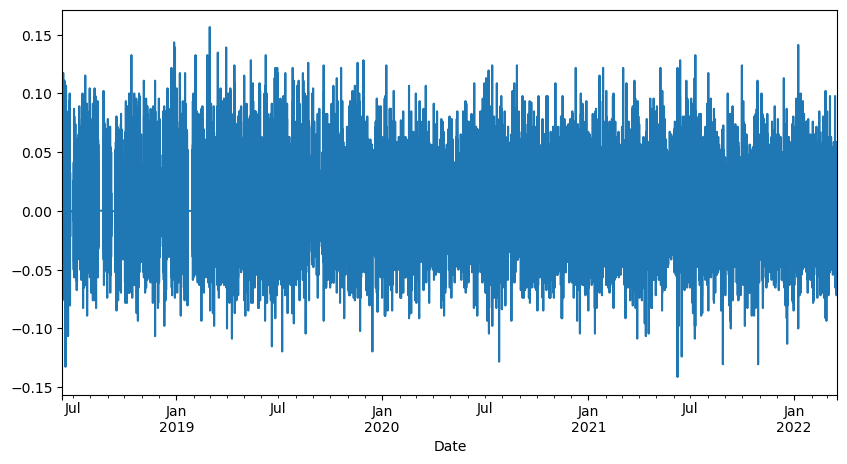

In [72]:
paciente_data_15['Yt'].plot(figsize=(10, 5))

##  Análisis de correlación

In [73]:
paciente_df=paciente_data_15[features].copy()
correlated_features = set()
correlation_matrix = paciente_df.corr() 
#obtenemos las caracteristicas que tienen correlacion >0.5 con respecto a la variable objetivo "Glucose level"
correlated_features = correlation_matrix.index[abs(correlation_matrix["Glucose level"])>0.5]
            
correlation_matrix

,Glucose level,hour,min,pod_id,level_id
Glucose level,1.000000,0.052338,-0.000714,0.058993,0.635347
hour,0.052338,1.000000,0.000012,0.010564,0.056098
min,-0.000714,0.000012,1.000000,0.000003,0.000831
pod_id,0.058993,0.010564,0.000003,1.000000,0.037064
level_id,0.635347,0.056098,0.000831,0.037064,1.000000


In [74]:
correlated_features

Index(['Glucose level', 'level_id'], dtype='object')

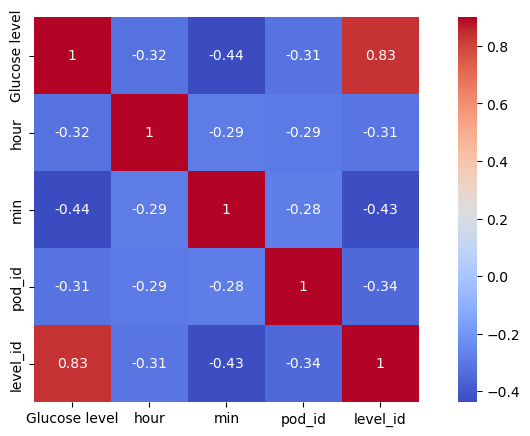

In [75]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix[features].corr(),  vmax=.9, square=True, annot=True,cmap='coolwarm')
plt.show()

##  Análisis de balanceo de clases

### Clase: Hora del día

<AxesSubplot:>

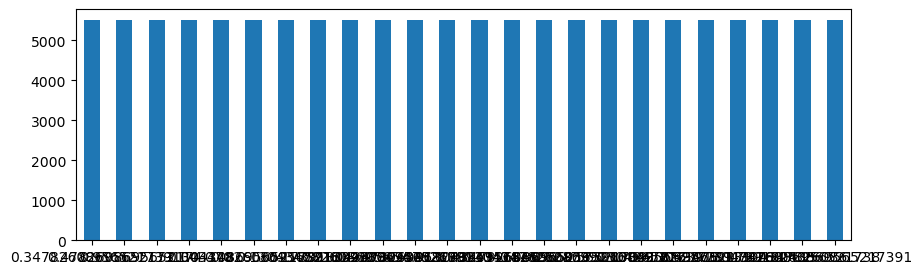

In [76]:
paciente_data_15['hour'].value_counts().plot.bar( rot=0,figsize=(10, 3))

### Clase: Parte del día

<AxesSubplot:>

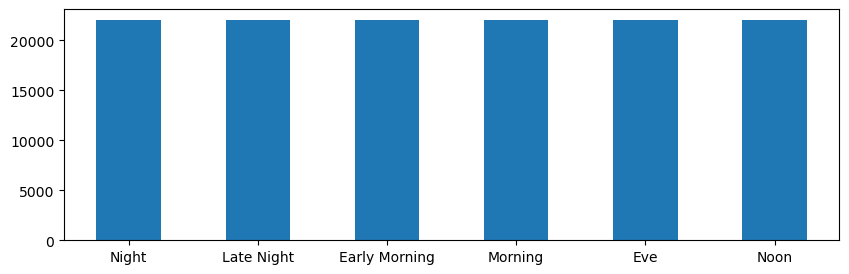

In [77]:
paciente_data_15['pod_label'].value_counts().plot.bar( rot=0,figsize=(10, 3))

### Clase: Niveles de Glucosa

<AxesSubplot:>

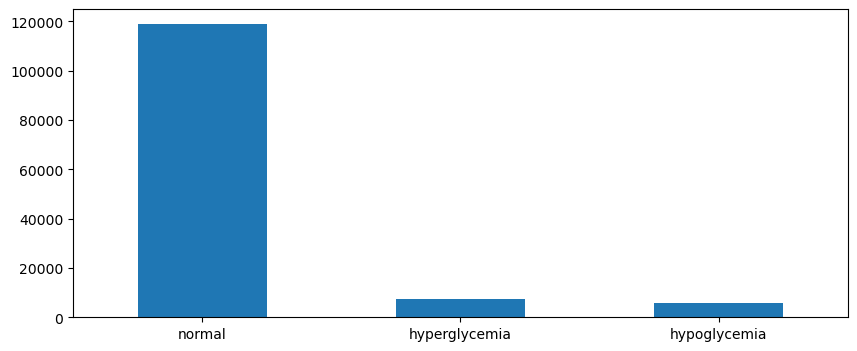

In [78]:
paciente_data_15['level_label'].value_counts().plot.bar( rot=0,figsize=(10, 4))

<AxesSubplot:ylabel='level_label'>

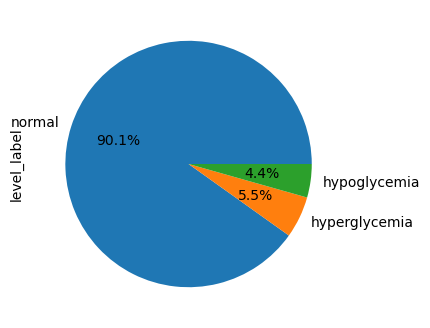

In [79]:
paciente_data_15['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

In [80]:
paciente_data_15['level_label'].value_counts()

normal           118958
hyperglycemia      7220
hypoglycemia       5789
Name: level_label, dtype: int64